# Question 3

Importing important modules and the given file `3.data`:

In [360]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import norm

filepath = '../3.data'
data = np.loadtxt(filepath)

### Task A
Finding first and second moments $\mu_1^{\text{Gamma}}$ and $\mu_2^{\text{Gamma}}$ of the given random variable

In [361]:
mu_1 = np.mean(data)
mu_2 = np.mean(data**2)
print("First moment is: ", mu_1)
print("Second moment is: ", mu_2)

First moment is:  6.496145618324817
Second moment is:  46.554361807879815


### Task B
Plot a histogram and graphically guess mode

Estimated mode:  5.933185887974433


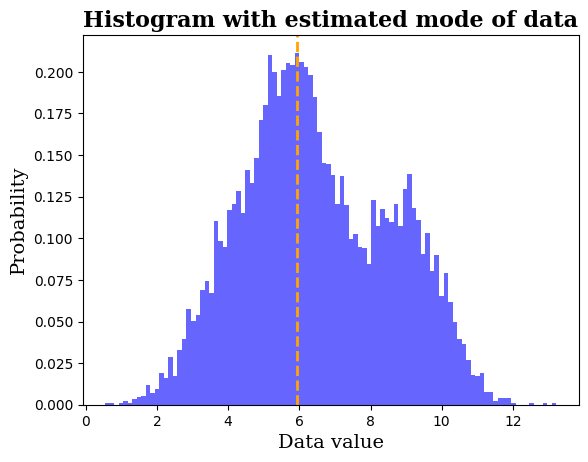

In [362]:
counts, bin_edges, _ = plt.hist(data, bins=100, density=True, alpha=0.6, color='b')

max_bin_index = np.argmax(counts)

mode_estimate = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2
print("Estimated mode: ", mode_estimate)

plt.axvline(mode_estimate, color='orange', linestyle='dashed', linewidth=2)

plt.title(f'Histogram with estimated mode of data', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('Data value', fontsize=14, fontfamily='serif')
plt.ylabel('Probability', fontsize=14, fontfamily='serif')

plt.savefig('../images/3b.png', dpi=1000)
plt.show()

### Task C
Estimate the best binomial distribution approximation to the given data by equating first and second moments. For $X\sim\text{Bin}(n,p)$, $P[X=x] = \binom{n}{x}p^x(1-p)^{n-x}$. Moments $\mu_1 = np$ and $\mu_2 = np(1-p) + n^2p^2$.

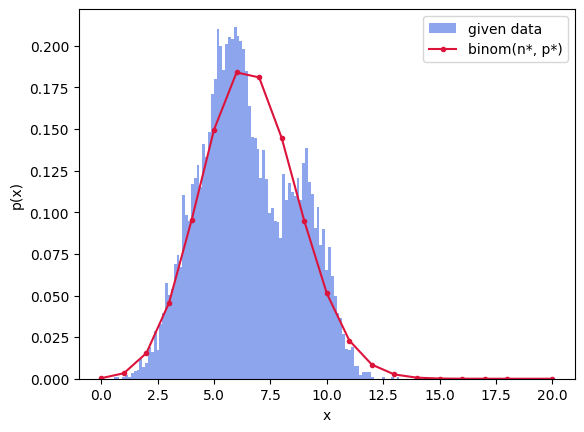

In [363]:
def equation_binom(params):
    n, p = params
    mu_1_bin = n*p
    mu_2_bin = n*(n-1)*(p**2)+n*p
    return [mu_1_bin - mu_1, mu_2_bin - mu_2]

n, p = fsolve(equation_binom, [1, 1])
n_floor = np.floor(n)
n_ceil = np.ceil(n)

floor_error = np.sum(np.abs(np.array(equations([n_floor, p]))))
ceil_error = np.sum(np.abs(np.array(equations([n_ceil, p]))))

n_star = n_floor if floor_error < ceil_error else n_ceil # n*
p_star = p # p*

plt.hist(data, bins=100, density=True, alpha=0.6, color='royalblue', label='given data')

x = np.linspace(0, n_star, num=20, dtype=int)
binom_pmf = binom.pmf(x, n_star, p_star)
plt.plot(x,binom_pmf, marker='.', linestyle='-', color='crimson', label='binom(n*, p*)')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

plt.savefig('../images/3c.png', dpi=1000)


### Task D
Estimate the best gamma distribution approximation to the given data by equating first and second moments. For $X\sim\text{Gamma}(n,p)$, $\mu_1 = k\theta$ and $\mu_2 = k(k+1)\theta^2$.

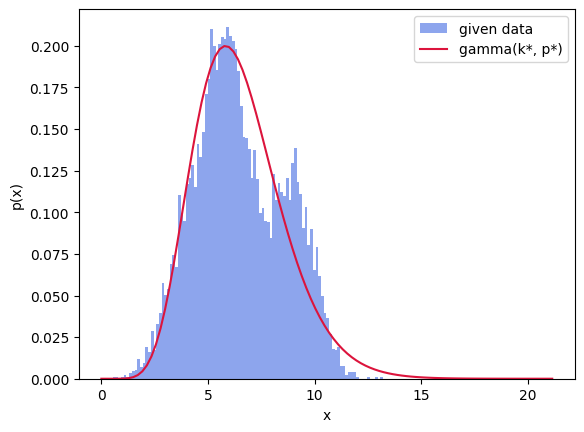

In [364]:
def equation_gamma(params):
    k, theta = params
    mu_1_gam = k*theta
    mu_2_gam = k*(k+1)*(theta**2)
    return [mu_1_gam - mu_1, mu_2_gam - mu_2]

k_star, theta_star = fsolve(equation_gamma, [1, 1]) # k*, theta*

plt.hist(data, bins=100, density=True, alpha=0.6, color='royalblue', label='given data')

x = np.linspace(0, 1.6*max(data), num=100)
gamma_pdf = gamma.pdf(x, a=k_star, scale=theta_star)
plt.plot(x, gamma_pdf, marker='', linestyle='-', color='crimson', label='gamma(k*, p*)')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

plt.savefig('../images/3d.png', dpi=1000)

### Task E
\begin{align}
\mathcal{L}(\lambda_0|S) &:= \prod_{i=1}^n P_{\lambda_0}[X_i] \\
\ell(\theta|S) &:= \frac{\log{\mathcal{L}(\lambda_0|S)}}{n} \\
&= \frac{\sum_{i=1}^n \log{P_{\lambda_0}[X_i]}}{n}
\end{align}

In [369]:
p_xi_binom = binom.pmf(np.round(data), n_star, p_star)

log_p_xi_gamma = gamma.logpdf(data, k_star, theta_star)
log_likelihood_binom = np.mean(np.log(p_xi_binom))
log_likelihood_gamma = np.mean(log_p_xi_gamma)
"""
uncomment this to get explanation for below note
minimum gamma(x) for all x in data
min_gamma = gamma.pdf([min(data)], k_star, theta_star)
print("Minimum value of data: ", min(data))
print("Gamma value for it (minimum gamma value): ", min_gamma)
print("Gamma value for 0.68 (reference): ", gamma.pdf([0.68], k_star, theta_star))
print("Log of it (minimum log value): ", np.log(min_gamma))
"""

print("Log Likelihood for best-fit binomial distribution: ", log_likelihood_binom)
print("Log Likelihood for best-fit gamma distribution: ", log_likelihood_gamma)

Log Likelihood for best-fit binomial distribution:  -2.1570681154346776
Log Likelihood for best-fit gamma distribution:  -inf


**Note:** Log likelihood for gamma distibution returns `-inf` because `P[X_i]` is very small for few values of `x`. For eg. `P[X_i]`$\approx 10^{-23}$ for $x=0.68$, which is approximated to zero by python, whose log is giving infinity. Therefore **binomial distribution is the better distribution out of the both.**

### Task F

For
\begin{equation}
P[x] = \frac{1}{\sqrt{2\pi}}\left(p_1\exp{\left(-\frac{(x-\mu_1)^2}{2}\right)} + p_2\exp{\left(-\frac{(x-\mu_2)^2}{2}\right)}\right)
\end{equation}
We have
\begin{align}
	\mu_1^\text{gmm} & = p_1\mu_1 + p_2\mu_2                                                                               \\
	\mu_2^\text{gmm} & = p_1(\sigma_1^2+\mu_1^2) + p_2(\sigma_2^2+\mu_2^2)                                                 \\
	\mu_3^\text{gmm} & = p_1(\sigma_1^3+3\sigma_1\mu_1^2) + p_2(\sigma_2^3+3\sigma_2\mu_2^2)                               \\
	\mu_4^\text{gmm} & = p_1(\mu_1^4 + 6\mu_1^2\sigma_1^2 + 3\sigma_1^4) + p_2(\mu_2^4 + 6\mu_2^2\sigma_2^2 + 3\sigma_2^4)
\end{align}

we also have that $\sigma_1 = \sigma_2 = 1$


5.129607694285282 0.6118740341610936 8.77436305441652 0.3826456511927248


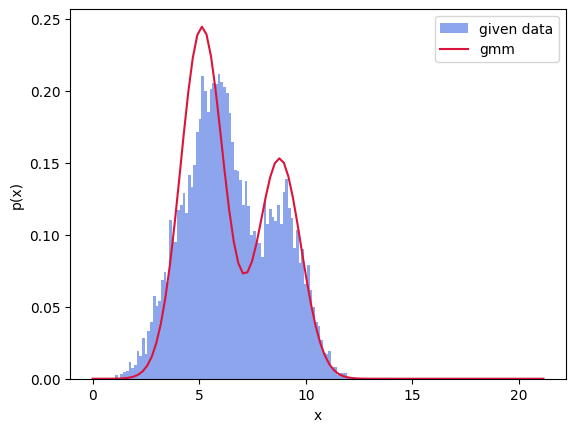

In [366]:
mu_3 = np.mean(data**3)
mu_4 = np.mean(data**4)

def equation_gmm(params):
    m1, p1, m2, p2 = params
    m1_gmm = p1*m1 + p2*m2
    m2_gmm = p1*(1+m1**2) + p2*(1+m2**2)
    m3_gmm = p1*(m1**3+3*m1) + p2*(m2**3+3*m2)
    m4_gmm = p1*(m1**4+6*m1**2+3) + p2*(m2**4+6*m2**2+3)
    return [m1_gmm-mu_1, m2_gmm-mu_2, m3_gmm-mu_3, m4_gmm-mu_4]

m1_star, p1_star, m2_star, p2_star = fsolve(equation_gmm, [6,0,9,0])

plt.hist(data, bins=100, density=True, alpha=0.6, color='royalblue', label='given data')

x = np.linspace(0, 1.6*max(data), num=100)
norm1 = norm.pdf(x, m1_star, 1)
norm2 = norm.pdf(x, m2_star, 1)
norm_pdf = p1_star*norm1 + p2_star*norm2
plt.plot(x, norm_pdf, marker='', linestyle='-', color='crimson', label='gmm')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

plt.savefig('../images/3f.png', dpi=1000)

Calculating average negative log-likelihood of this GMM distribution

In [370]:
p_xi_norm = p1_star*norm.pdf(data, m1_star, 1) + p2_star*norm.pdf(data, m2_star, 1)
nll_norm = -(np.mean(np.log(p_xi_norm)))
print("Negative log likelihood for two-component gaussian mixture: ", nll_norm)

Negative log likelihood for two-component gaussian mixture:  2.1830387449113196


This is better than gamma distribution but not better than binomial distribution.


 Let's try to find the actual distribution which has 6 parameters, I believe the remaining two are variance which we took as 1 previously. Since there are six parameters, we've to take the 6 moments. 5th and 6th moments are
\begin{align}
	\mu_5^\text{gmm} & = p_1(\mu_1^5+10\mu_1^3\sigma_1^2+15\mu_1\sigma_1^4) + p_2(\mu_2^5 + 10\mu_2^3\sigma_2^2+15\mu_2\sigma_2^4) \\
	\mu_6^\text{gmm} & = p_1(\mu_1^6+15\mu_1^4\sigma_1^2+45\mu_1^2\sigma_1^4+15\sigma_1^6) + p_2(\mu_2^6 + 15\mu_2^4\sigma_2^2+45\mu_2^2\sigma_2^4+15\sigma_2^6)
\end{align}

5.169332403706969 0.6041923647631215 1.1966822097553382 8.59260479121461 0.3925322449942942 1.2036192404075223


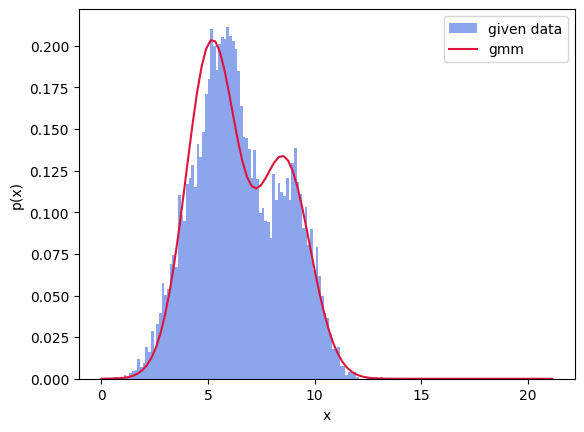

In [368]:
mu_5 = np.mean(data**5)
mu_6 = np.mean(data**6)
def equation_gmm_var (params):
    m1, p1, s1, m2, p2, s2 = params
    m1_gmm = p1*m1 + p2*m2
    m2_gmm = p1*(s1**2+m1**2) + p2*(s1**2+m2**2)
    m3_gmm = p1*(m1**3+3*m1*(s1**2)) + p2*(m2**3+3*m2*(s2**2))
    m4_gmm = p1*(m1**4+6*(m1**2)*(s1**2)+3*(s1**4)) + p2*(m2**4+6*(m2**2)*(s2**2)+3*s2**4)
    m5_gmm = p1 * (m1**5 + 10 * (m1**3) * (s1**2) + 15 * m1 * (s1**4)) + p2 * ( m2**5 + 10 * (m2**3) * (s2**2) + 15 * m2 * (s2**4))
    m6_gmm = p1 * ( m1**6 + 15 * (m1**4) * (s1**2) + 45 * (m1**2) * (s1**4) + 15 * (s1**6)) + p2 * (m2**6 + 15 * (m2**4) * (s2**2) + 45 * (m2**2) * (s2**4) + 15 * (s2**6))


    return ([m1_gmm-mu_1, m2_gmm-mu_2, m3_gmm-mu_3, m4_gmm-mu_4, m5_gmm-mu_5, m6_gmm-mu_6])

m1_vstar, p1_vstar, s1_vstar, m2_vstar, p2_vstar, s2_vstar = fsolve(equation_gmm_var, [6, 0.2, 0.7, 10, 0.2, 0.3])
print(m1_vstar, p1_vstar, s1_vstar, m2_vstar, p2_vstar, s2_vstar)

plt.hist(data, bins=100, density=True, alpha=0.6, color='royalblue', label='given data')

x = np.linspace(0, 1.6*max(data), num=100)
normv1= norm.pdf(x, m1_vstar, s1_vstar)
normv2= norm.pdf(x, m2_vstar, s2_vstar)
norm_pdf = p1_vstar*normv1+ p2_vstar*normv2
plt.plot(x, norm_pdf, marker='', linestyle='-', color='crimson', label='gmm')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

plt.savefig('../images/3f-bonus.png',dpi=1000)
